**<h1> Activity 8: Machine Learning**


---


**<h1> Part B:** Image Classification</h1>
In this part, We will create image classification program to classify which picture is spoon, fork, pillow, hanger or toilet roll. 
<br>
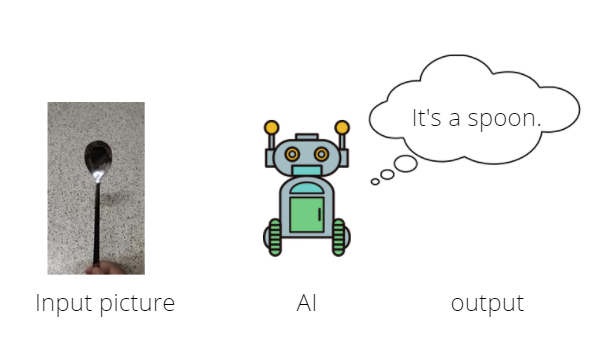

**1. Install tools using shell command.**

        pip install <MODULE_NAME>==<MODULE_VERSION>


*   tensorflow <font color='red'> ***version 1.15.0*** </font>


 To run shell comman in IPython you can use character ! before your shell command. For example, using !pwd command to print current working directory path. 

In [ ]:
########### Your code Here ##############
# Install tools using command line.


########## End of your code #############

**2. Collect training Data.** <br>
  One of the effective method for getting Image training data is Capture from video files. <br>
  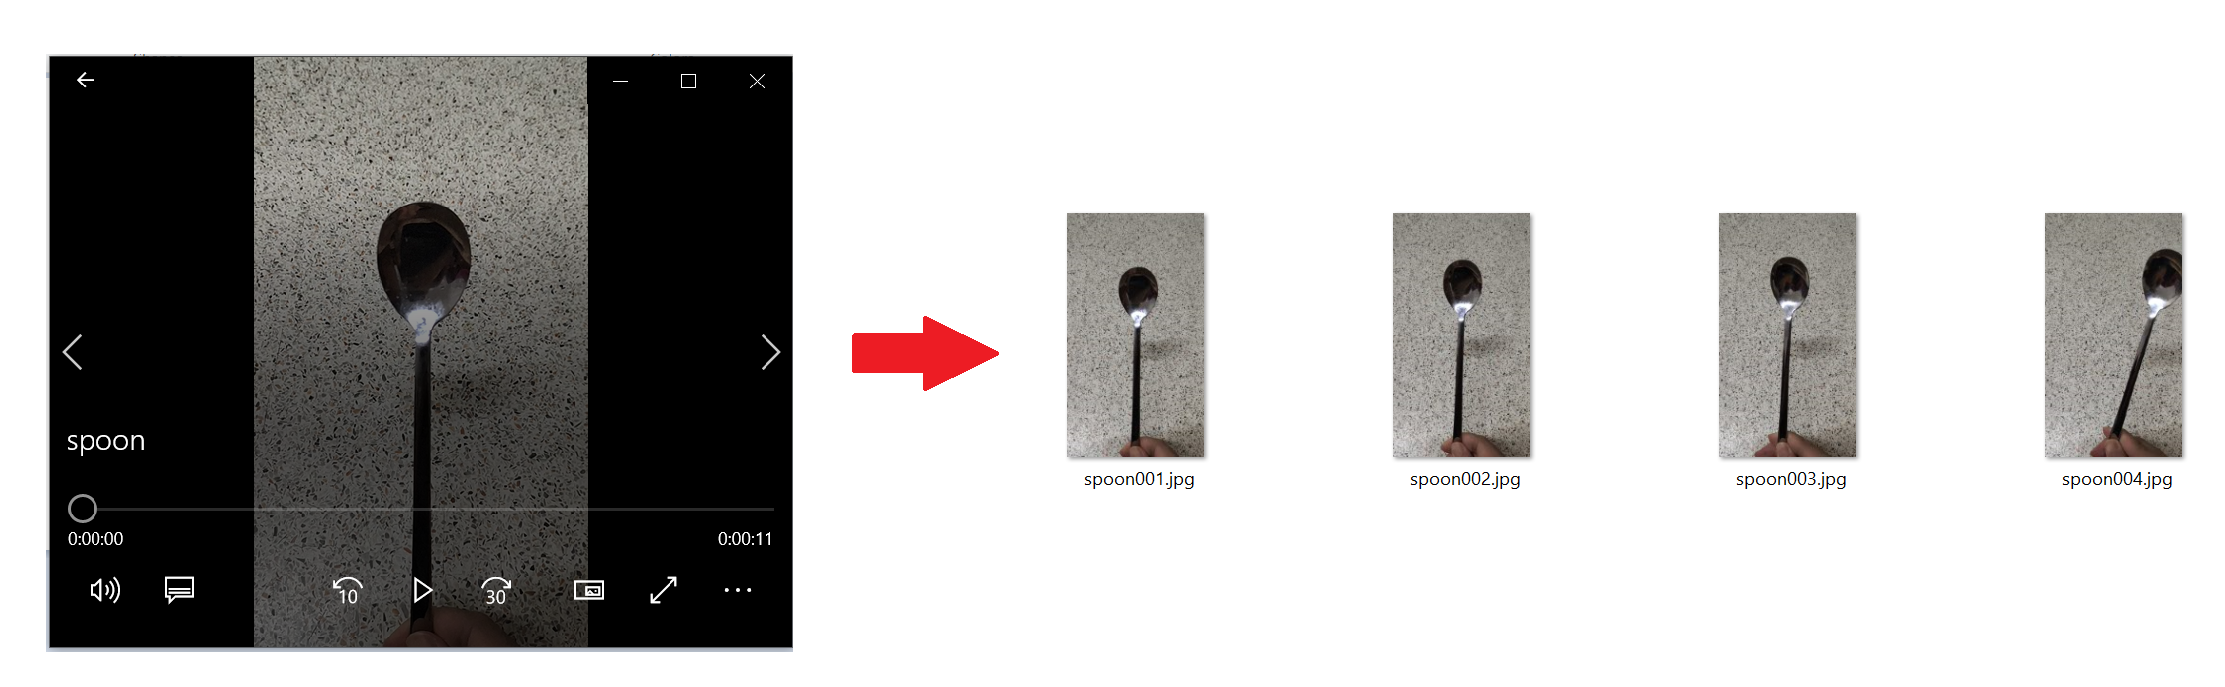

2.1 Upload your video clips as **prepared in pre-test** (videos of fork, spoon, hanger, pillow).

drag all of your video file to Files tab in Colab. Then press refesh button in Files tab.<br>
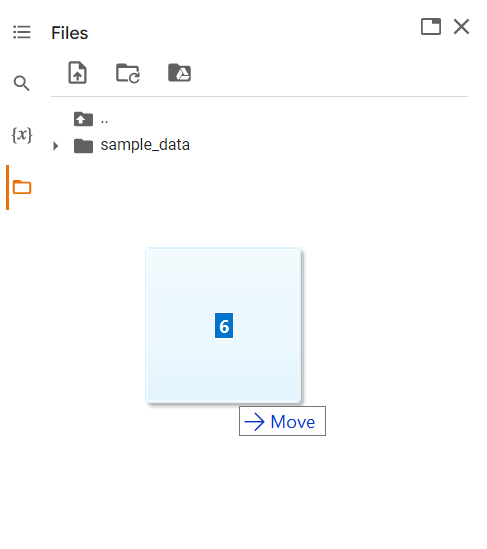

2.2 Sample image using shell script.<br>

              ffmpeg -i myvideo.mov -vf fps=1 img%03d.jpg

This will output one image every second, named img001.jpg, img002.jpg, img003.jpg, etc. You can generate more photos by adjusting the fps to 2 or 3. The %03d dictates that the ordinal number of each output image will be formatted using 3 digits. <br><br>
 should be put in separate folders accImagesordingly: <br>
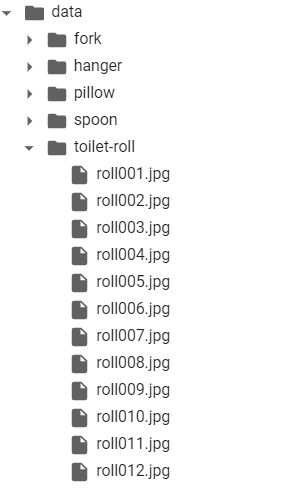

<br><br>
**Hint**: You might want to have at least ~100 photos in each class (folder)

In [ ]:
######### YOUR CODE HERE ##########

######### END OF CODE #############

**3. Training Model** <br>
Image classifiacetion Program is provided on github. Run the below cell to downlod .py files to colab 

In [ ]:
!wget https://raw.githubusercontent.com/peerawatchomp/com-eng-ess-activitiy8/main/Activity9-2-Image-Classification/label_image.py
!wget https://raw.githubusercontent.com/peerawatchomp/com-eng-ess-activitiy8/main/Activity9-2-Image-Classification/retrain.py

Import the downloaded module.

In [ ]:
import warnings
warnings.filterwarnings("ignore")
import retrain
import label_image


Re Training Model.

In [ ]:
retrain.retrain(bottleneck_dir = 'bottlenecks', 
            how_many_training_steps = 500,
            model_dir = 'inception',  
            summaries_dir= 'training_summaries/basic', 
            output_graph= 'retrained_graph.pb', 
            output_labels= 'retrained_labels.txt',
            image_dir= 'data/', 
            )

While waiting for the retraining process, let’s explore Google’s Cloud Vision API (https://cloud.google.com/vision/). Pick images from each class and input them to the demo. Discuss what Google sees in those images. Can it tell the differences?<br>
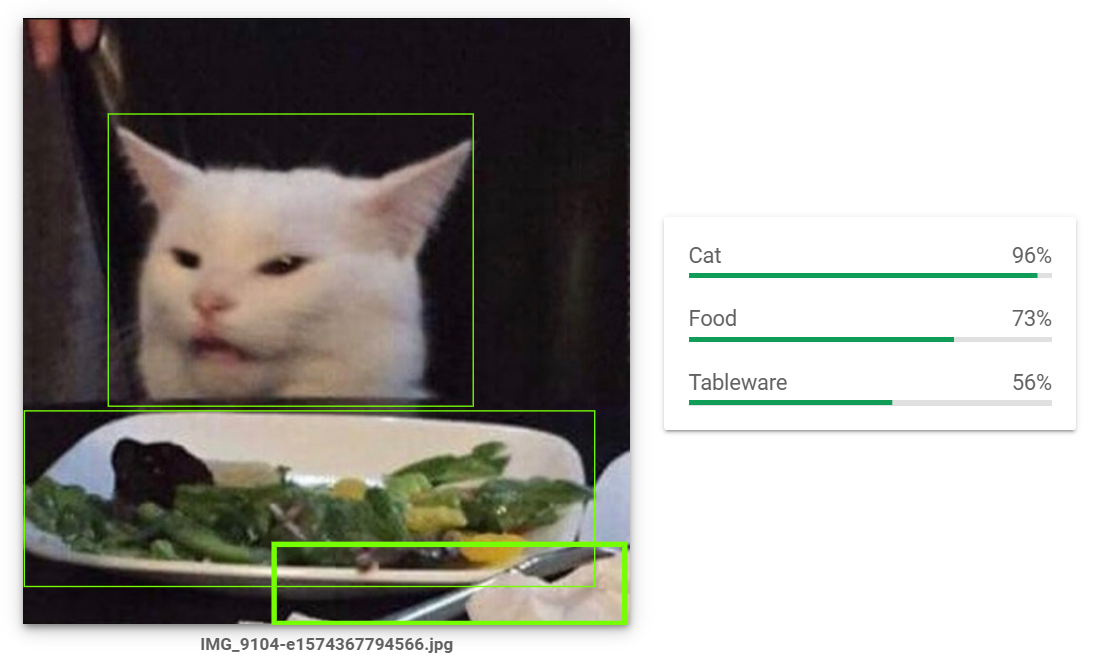

Testing Model.

<font color=red>**Please ask password for unrar test image from TA.** </font>

In [ ]:
!wget https://raw.githubusercontent.com/peerawatchomp/com-eng-ess-activitiy8/main/test.rar
!unrar x -p test.rar

In [ ]:
TEST_IMAGE_PATH = ['test/fork1.jpg',
                   'test/hanger1.jpg',
                   'test/pillow1.jpg',
                   'test/spoon1.jpg',
                   'test/toilet-roll1.jpg'
                    ]

GRAPH_PATH = 'retrained_graph.pb'
LABEL_PATH = 'retrained_labels.txt'

for p in TEST_IMAGE_PATH:
  print(p)
  label_image.predict(
      image = p,
      graph = GRAPH_PATH,
      labels = LABEL_PATH
  )
  print('\n')